In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the excel file in excel_data folder
df = pd.read_excel('../all_genes_data/all_genes_data.xlsx', sheet_name='Sheet1', skiprows=7, names=['Target', 'ac', 'ac2', 'ac3', 'MRC5', 'MRC52', 'MRC53', 'hOB', 'hOB2', 'hOB3'])

In [3]:
# make the Target column the index
df.set_index('Target', inplace=True)
df.head()

,ac,ac2,ac3,MRC5,MRC52,MRC53,hOB,hOB2,hOB3
Target,,,,,,,,,
SPRY4,3.730821,3.798188,3.451263,3.497535,3.689837,3.552548,3.900631,4.094785,3.828594
GTF2H3,3.515030,3.485248,3.169992,2.932415,3.209663,2.437185,2.662102,3.085906,3.073130
FCGR3A/B,3.281045,3.664448,3.573407,2.681745,2.912696,2.343588,2.856153,2.221520,3.023712
ATG5,3.470017,3.579098,3.131463,3.525251,3.321418,3.567146,2.779095,3.477778,3.437836
GLUD1,3.178131,3.400363,3.312186,2.951279,2.739936,2.616457,2.603546,3.368913,2.745644


## T-test significantly changed gene expression for hOB vs ac and MRC vs ac (Welch's t-test)

In [4]:
df_ttest = df.copy()

In [5]:
# make new dataframe for each group
df_hOB = df_ttest[['hOB', 'hOB2', 'hOB3']].T
df_ac = df_ttest[['ac', 'ac2', 'ac3']].T
df_MRC5 = df_ttest[['MRC5', 'MRC52', 'MRC53']].T

In [6]:
gene_list = df_ttest.index.values.tolist()

print('no. of genes in pathway: ', len(gene_list))

no. of genes in pathway:  1333


In [7]:
# t-test MRC vs ac

MRC5_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_MRC5[gene], df_ac[gene], equal_var = False)
    if pval < 0.05:
        MRC5_changed_genes.append(gene)

print('% of genes that changed in MRC5: ', 100*len(MRC5_changed_genes)/len(gene_list))
print('no. of genes that changed in MRC5: ', len(MRC5_changed_genes))

% of genes that changed in MRC5:  53.1132783195799
no. of genes that changed in MRC5:  708


In [8]:
# t-test hOB vs ac

hOB_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_hOB[gene], df_ac[gene], equal_var = False)
    if pval < 0.05:
        hOB_changed_genes.append(gene)

print('% of genes that changed in hOB: ', 100*len(hOB_changed_genes)/len(gene_list))
print('no. of genes that changed in hOB: ', len(hOB_changed_genes))

% of genes that changed in hOB:  32.40810202550637
no. of genes that changed in hOB:  432


In [9]:
print('% of genes that changed in either MRC5 or hOB: ', 100*len(set(MRC5_changed_genes).union(hOB_changed_genes))/len(gene_list))

% of genes that changed in either MRC5 or hOB:  61.59039759939985


### Find which % increased or decreased expression in MRC vs ac and hOB vs ac

In [10]:
# make new columns for the average of each group
df_ttest['hOB_avg'] = df_ttest[['hOB', 'hOB2', 'hOB3']].mean(axis=1)
df_ttest['ac_avg'] = df_ttest[['ac', 'ac2', 'ac3']].mean(axis=1)
df_ttest['MRC5_avg'] = df_ttest[['MRC5', 'MRC52', 'MRC53']].mean(axis=1)

In [11]:
# find no. of genes that increased in MRC5
MRC5_up_genes = []

for gene in MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'ac_avg']:
        MRC5_up_genes.append(gene)

print('no. of genes that increased in MRC5: ', len(MRC5_up_genes))

# find no of genes that decreased in MRC5
MRC5_down_genes = []

for gene in MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'ac_avg']:
        MRC5_down_genes.append(gene)

print('no. of genes that decreased in MRC5: ', len(MRC5_down_genes))

print('percentage of changed genes that increased in MRC5: ', 100*len(MRC5_up_genes)/len(MRC5_changed_genes))
print('percentage of changed genes that decreased in MRC5: ', 100*len(MRC5_down_genes)/len(MRC5_changed_genes))

print('percentage of total genes that increased in MRC5: ', 100*len(MRC5_up_genes)/len(gene_list))
print('percentage of total genes that decreased in MRC5: ', 100*len(MRC5_down_genes)/len(gene_list))


no. of genes that increased in MRC5:  229
no. of genes that decreased in MRC5:  479
percentage of changed genes that increased in MRC5:  32.344632768361585
percentage of changed genes that decreased in MRC5:  67.65536723163842
percentage of total genes that increased in MRC5:  17.179294823705927
percentage of total genes that decreased in MRC5:  35.93398349587397


In [12]:
# find no. of genes that increased in hOB
hOB_up_genes = []

for gene in hOB_changed_genes:
    if df_ttest.loc[gene, 'hOB_avg'] > df_ttest.loc[gene, 'ac_avg']:
        hOB_up_genes.append(gene)

print('no. of genes that increased in hOB: ', len(hOB_up_genes))

# find no of genes that decreased in hOB
hOB_down_genes = []

for gene in hOB_changed_genes:
    if df_ttest.loc[gene, 'hOB_avg'] < df_ttest.loc[gene, 'ac_avg']:
        hOB_down_genes.append(gene)

print('no. of genes that decreased in hOB: ', len(hOB_down_genes))

print('percentage of changed genes that increased in hOB: ', 100*len(hOB_up_genes)/len(hOB_changed_genes))
print('percentage of changed genes that decreased in hOB: ', 100*len(hOB_down_genes)/len(hOB_changed_genes))

print('percentage of total genes that increased in hOB: ', 100*len(hOB_up_genes)/len(gene_list))
print('percentage of total genes that decreased in hOB: ', 100*len(hOB_down_genes)/len(gene_list))


no. of genes that increased in hOB:  174
no. of genes that decreased in hOB:  258
percentage of changed genes that increased in hOB:  40.27777777777778
percentage of changed genes that decreased in hOB:  59.72222222222222
percentage of total genes that increased in hOB:  13.053263315828957
percentage of total genes that decreased in hOB:  19.35483870967742


In [13]:
# find no. of genes that increased in both
both_up_genes = []

for gene in set(MRC5_changed_genes).intersection(hOB_changed_genes):
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'ac_avg'] and df_ttest.loc[gene, 'hOB_avg'] > df_ttest.loc[gene, 'ac_avg']:
        both_up_genes.append(gene)

print('no. of genes that increased in both: ', len(both_up_genes))

# find no of genes that decreased in both
both_down_genes = []

for gene in set(MRC5_changed_genes).intersection(hOB_changed_genes):
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'ac_avg'] and df_ttest.loc[gene, 'hOB_avg'] < df_ttest.loc[gene, 'ac_avg']:
        both_down_genes.append(gene)

print('no. of genes that decreased in both: ', len(both_down_genes))


no. of genes that increased in both:  117
no. of genes that decreased in both:  183


In [14]:
print('no of genes that increased in MRC5 and decreased in hOB: ', len(set(MRC5_up_genes).intersection(hOB_down_genes)))

print('no of genes that decreased in MRC5 and increased in hOB: ', len(set(MRC5_down_genes).intersection(hOB_up_genes)))

no of genes that increased in MRC5 and decreased in hOB:  7
no of genes that decreased in MRC5 and increased in hOB:  12


## Donut plot to show changes in gene expression overall (vs acellular)

In [15]:
# find % of genes upregulated in MRC5 but not in hOB_changed_genes

MRC5_up_only= []

for gene in MRC5_up_genes:
    if gene not in hOB_changed_genes:
        MRC5_up_only.append(gene)


# find % of genes downregulated in MRC5 but not in hOB_changed_genes

MRC5_down_only= []

for gene in MRC5_down_genes:
    if gene not in hOB_changed_genes:
        MRC5_down_only.append(gene)

In [16]:
# find % of genes upregulated in hOB but not in MRC5_changed_genes

hOB_up_only= []

for gene in hOB_up_genes:
    if gene not in MRC5_changed_genes:
        hOB_up_only.append(gene)

# find % of genes downregulated in hOB but not in MRC5_changed_genes

hOB_down_only= []

for gene in hOB_down_genes:
    if gene not in MRC5_changed_genes:
        hOB_down_only.append(gene)
        

In [17]:
# find % of genes upregulated in MRC5 and downregulated in hOB

MRC5_up_hOB_down= []

for gene in set(MRC5_up_genes).intersection(hOB_down_genes):
    MRC5_up_hOB_down.append(gene)

# find % of genes downregulated in MRC5 and upregulated in hOB

MRC5_down_hOB_up= []

for gene in set(MRC5_down_genes).intersection(hOB_up_genes):
    MRC5_down_hOB_up.append(gene)

# combine lists
differentially_expressed = MRC5_up_hOB_down + MRC5_down_hOB_up 

In [18]:
percent_list = [len(MRC5_up_only)/len(gene_list), len(MRC5_down_only)/len(gene_list), len(hOB_up_only)/len(gene_list), len(hOB_down_only)/len(gene_list), len(both_up_genes)/len(gene_list), len(both_down_genes)/len(gene_list), len(differentially_expressed)/len(gene_list)]

changed_percent = np.sum(percent_list)

percent_list.append(1-changed_percent)

In [19]:
cmap = plt.get_cmap("tab20")
colors = cmap([2, 3, 8, 9, 18, 19, 12, 15]) # these will all be the same

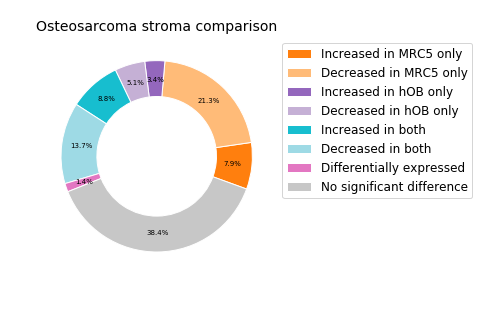

In [20]:
fig, ax = plt.subplots(figsize =(5.5, 5.5))

size = 0.3

_, _, inner_autotext = ax.pie(percent_list, radius=0.8, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8, textprops=dict(fontsize=7), startangle=-20)

# make legend 
labels = ['Increased in MRC5 only', 'Decreased in MRC5 only', 'Increased in hOB only', 'Decreased in hOB only', 'Increased in both', 'Decreased in both', 'Differentially expressed', 'No significant difference']
ax.legend(labels, loc='upper left', bbox_to_anchor=(0.9,0.9), fontsize=12)

plt.title('Osteosarcoma stroma comparison', fontsize=14, position=(0.5, 0.9))

plt.savefig('../all_genes_figures/osteosarcoma_overview_donut.png', dpi=300, bbox_inches='tight')

## Genes with altered expression in MRC vs ac only 

In [21]:
# remove log transform to find fold change
df_ttest = 2**df_ttest

In [22]:
MRC5_changed_only = MRC5_up_only + MRC5_down_only

In [23]:
MRC5_up_vs_ac_fold_change = []

for gene in MRC5_up_only:
    MRC5_up_vs_ac_fold_change.append(df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'ac_avg'])

MRC5_down_vs_ac_fold_change = []

for gene in MRC5_down_only:
    MRC5_down_vs_ac_fold_change.append(df_ttest.loc[gene, 'ac_avg']/df_ttest.loc[gene, 'MRC5_avg'])


[(11.748484716524855, 'H3C10'), (10.802183807503928, 'HLA-A'), (10.704720670188191, 'HLA-B'), (10.57032101852035, 'ALDOA'), (10.389936724467503, 'BST2'), (10.136764987324677, 'IFI27'), (9.123022442773488, 'IFI6'), (8.36547049501411, 'HLA-C'), (7.248099451804131, 'CLU'), (7.183849923376896, 'TAP1')]


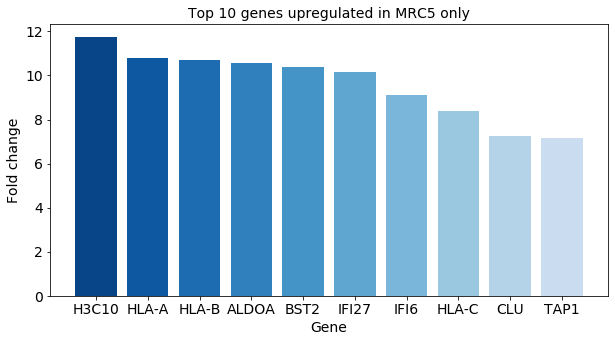

In [24]:
# make bar chart of 10 most upregulated genes in MRC5 vs ac

MRC5_up_vs_ac_top10 = []

# make list of blue colors from dark to light
colors = sns.color_palette("Blues_r", 12)

# make list of tuples using MRC5_up_vs_ac_fold_change and MRC5_up_only 
MRC5_up_vs_ac_top10 = [(MRC5_up_vs_ac_fold_change[i], MRC5_up_only[i]) for i in range(len(MRC5_up_vs_ac_fold_change))]

# order list in decreasing order of MRC5_up_vs_ac_fold_change
MRC5_up_vs_ac_top10.sort(reverse=True)

# make list of top 10 genes
MRC5_up_vs_ac_top10 = MRC5_up_vs_ac_top10[:10]
print(MRC5_up_vs_ac_top10)

# plot top 10 genes with multicolor bar chart
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(MRC5_up_vs_ac_top10)):
    ax.bar(MRC5_up_vs_ac_top10[i][1], MRC5_up_vs_ac_top10[i][0], color=colors[i])

ax.set_xlabel('Gene', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)
ax.set_title('Top 10 genes upregulated in MRC5 only', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../all_genes_figures/MRC5_up_top10.png', dpi=300, bbox_inches='tight')

    


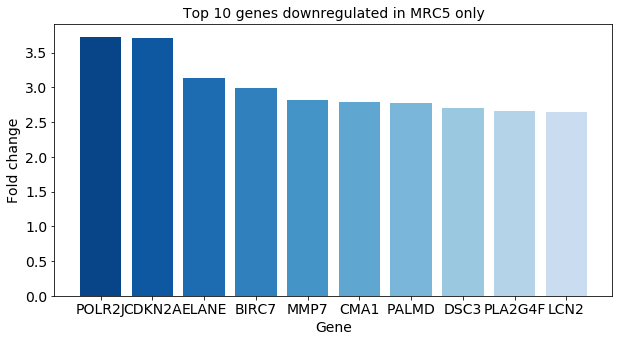

In [25]:
# make bar chart of 10 most downregulated genes in MRC5 vs ac

MRC5_down_vs_ac_top10 = []

# make list of tuples using MRC5_down_vs_ac_fold_change and MRC5_down_only
MRC5_down_vs_ac_top10 = [(MRC5_down_vs_ac_fold_change[i], MRC5_down_only[i]) for i in range(len(MRC5_down_vs_ac_fold_change))]

# order list in decreasing order of MRC5_down_vs_ac_fold_change
MRC5_down_vs_ac_top10.sort(reverse=True)

# make list of top 10 genes
MRC5_down_vs_ac_top10 = MRC5_down_vs_ac_top10[:10]

# plot top 10 genes with multicolor bar chart
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(MRC5_down_vs_ac_top10)):
    ax.bar(MRC5_down_vs_ac_top10[i][1], MRC5_down_vs_ac_top10[i][0], color=colors[i])

ax.set_xlabel('Gene', fontsize=14)
ax.set_ylabel('Fold change', fontsize=14)
ax.set_title('Top 10 genes downregulated in MRC5 only', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../all_genes_figures/MRC5_down_top10.png', dpi=300, bbox_inches='tight')

## Genes with altered expression in hOB vs ac only

In [26]:
hOB_changed_only = hOB_down_only + hOB_up_only

In [27]:
hOB_up_vs_ac_fold_change = []

for gene in hOB_up_only:
    hOB_up_vs_ac_fold_change.append(df_ttest.loc[gene, 'hOB_avg']/df_ttest.loc[gene, 'ac_avg'])

hOB_down_vs_ac_fold_change = []

for gene in hOB_down_only:
    hOB_down_vs_ac_fold_change.append(df_ttest.loc[gene, 'ac_avg']/df_ttest.loc[gene, 'hOB_avg'])


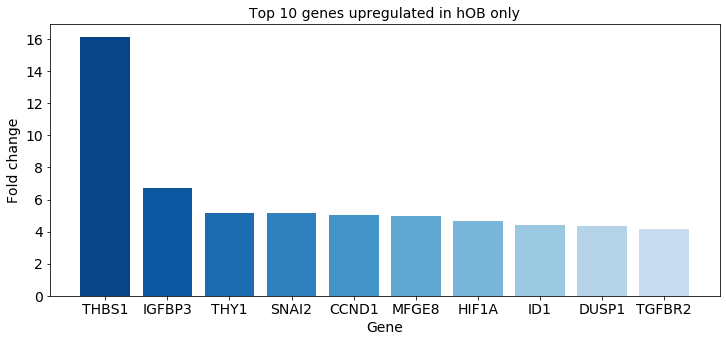

In [28]:
# make bar chart of 10 most upregulated genes in hOB vs ac

hOB_up_vs_ac_top10 = []

# make list of tuples using hOB_up_only and hOB_up_vs_ac_fold_change
for i in range(len(hOB_up_only)):
    hOB_up_vs_ac_top10.append((hOB_up_only[i], hOB_up_vs_ac_fold_change[i]))

# sort list of tuples by fold change
hOB_up_vs_ac_top10.sort(key=lambda tup: tup[1], reverse=True)

# make list of top 10 genes
hOB_up_vs_ac_top10 = hOB_up_vs_ac_top10[:10]

# plot top 10 genes
plt.figure(figsize=(12, 5))
for i in range(len(hOB_up_vs_ac_top10)):
    plt.bar(hOB_up_vs_ac_top10[i][0], hOB_up_vs_ac_top10[i][1], color=colors[i])

plt.xlabel('Gene', fontsize = 14)
plt.ylabel('Fold change', fontsize = 14)
plt.title('Top 10 genes upregulated in hOB only', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/hOB_up_top10.png', dpi=300)

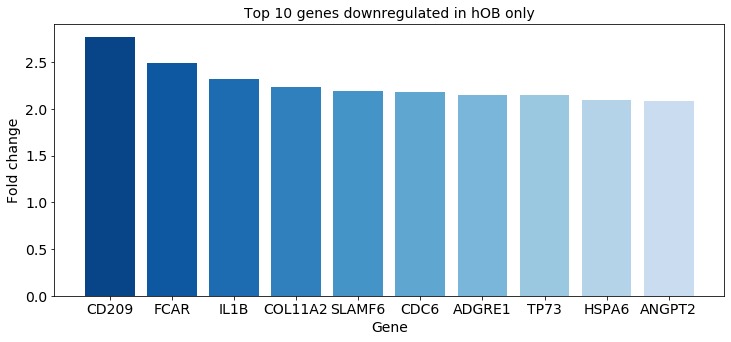

In [29]:
# make bar chart of 10 most downregulated genes in hOB vs ac

hOB_down_vs_ac_top10 = []

# make list of tuples using hOB_down_only and hOB_down_vs_ac_fold_change
for i in range(len(hOB_down_only)):
    hOB_down_vs_ac_top10.append((hOB_down_only[i], hOB_down_vs_ac_fold_change[i]))

# sort list of tuples by fold change
hOB_down_vs_ac_top10.sort(key=lambda tup: tup[1], reverse=True)

# make list of top 10 genes
hOB_down_vs_ac_top10 = hOB_down_vs_ac_top10[:10]

# plot top 10 genes
plt.figure(figsize=(12, 5))
for i in range(len(hOB_down_vs_ac_top10)):
    plt.bar(hOB_down_vs_ac_top10[i][0], hOB_down_vs_ac_top10[i][1], color=colors[i])

plt.xlabel('Gene', fontsize=14)
plt.ylabel('Fold change', fontsize=14)
plt.title('Top 10 genes downregulated in hOB only', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/hOB_down_top10.png', dpi=300)

## Genes differentially expressed MRC vs ac compared to hOB vs ac

In [30]:
MRC5_up_hOB_down_FC = []

for gene in MRC5_up_hOB_down:
    MRC5_up_hOB_down_FC.append(df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'hOB_avg'])

MRC5_down_hOB_up_FC = []

for gene in MRC5_down_hOB_up:
    MRC5_down_hOB_up_FC.append(df_ttest.loc[gene, 'hOB_avg']/df_ttest.loc[gene, 'MRC5_avg'])


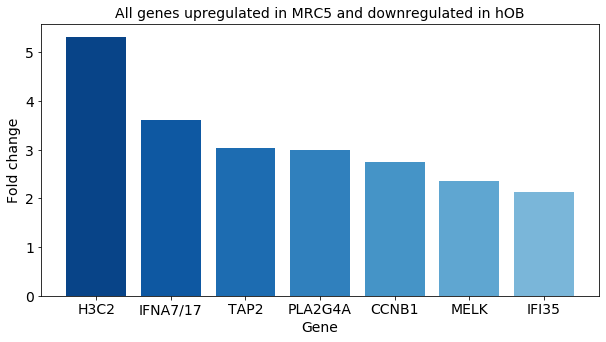

In [31]:
# make bar chart of genes upregulated in MRC5 and downregulated in hOB

# make tuple using MRC5_up_hOB_down and MRC5_up_hOB_down_FC
MRC5_up_hOB_down_all = []
for i in range(len(MRC5_up_hOB_down)):
    MRC5_up_hOB_down_all.append((MRC5_up_hOB_down[i], MRC5_up_hOB_down_FC[i]))

# sort list of tuples by fold change
MRC5_up_hOB_down_all.sort(key=lambda tup: tup[1], reverse=True)

# plot all genes
plt.figure(figsize=(10, 5))
for i in range(len(MRC5_up_hOB_down_all)):
    plt.bar(MRC5_up_hOB_down_all[i][0], MRC5_up_hOB_down_all[i][1], color=colors[i])

plt.xlabel('Gene', fontsize=14)
plt.ylabel('Fold change', fontsize=14)
plt.title('All genes upregulated in MRC5 and downregulated in hOB', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/MRC5_up_hOB_down_all.png', dpi=300)


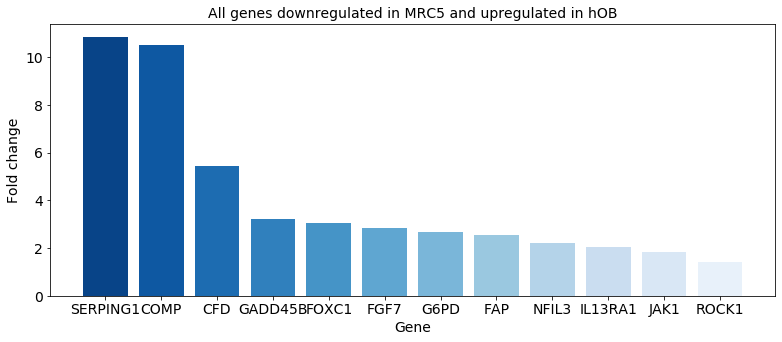

In [32]:
# make bar chart of genes downregulated in MRC5 and upregulated in hOB

# make tuple using MRC5_down_hOB_up and MRC5_down_hOB_up_FC
MRC5_down_hOB_up_all = []
for i in range(len(MRC5_down_hOB_up)):
    MRC5_down_hOB_up_all.append((MRC5_down_hOB_up[i], MRC5_down_hOB_up_FC[i]))
    
# sort list of tuples by fold change
MRC5_down_hOB_up_all.sort(key=lambda tup: tup[1], reverse=True)

# plot all genes
plt.figure(figsize=(13, 5))
for i in range(len(MRC5_down_hOB_up_all)):
    plt.bar(MRC5_down_hOB_up_all[i][0], MRC5_down_hOB_up_all[i][1], color=colors[i])

plt.xlabel('Gene', fontsize=14)
plt.ylabel('Fold change', fontsize=14)
plt.title('All genes downregulated in MRC5 and upregulated in hOB', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/MRC5_down_hOB_up_all.png', dpi=300)